# Final Project 'Introduction to Data Analysis'

# Best method to share a post on Instagram 
<div>
<img src="https://raw.githubusercontent.com/Kobi-Mazuz/Final_task/main/WhatsApp%20Image%202021-05-26%20at%2009.02.01.jpeg", width="200"/>
</div>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
url = 'https://raw.githubusercontent.com/Kobi-Mazuz/Final_task/main/Instagram_Data.csv'
df = pd.read_csv(url)
df.tail()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
178917,1089,9,821,0.07,Image,0,1,2018-11-29 14:40:11,2018,11,29,14,40
178918,1089,3,822,0.02,Image,3,0,2018-11-28 20:59:19,2018,11,28,20,59
178919,1089,2,822,0.01,Image,0,0,2018-11-28 16:27:32,2018,11,28,16,27
178920,1089,14,822,0.10,Image,0,2,2018-11-28 14:37:13,2018,11,28,14,37
178921,1089,9,823,0.07,Image,0,0,2018-11-27 14:27:42,2018,11,27,14,27


#### We imported the DataFrame and displayed it's last five rows to see what columns we are dealing with and the number of rows.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178922 entries, 0 to 178921
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   User uuid              178922 non-null  int64  
 1   Likes                  178922 non-null  int64  
 2   Days passed from post  178922 non-null  int64  
 3   Likes Score            178922 non-null  float64
 4   Type                   178922 non-null  object 
 5   Numer of Tags          178922 non-null  int64  
 6   Numer of Comments      178922 non-null  int64  
 7   Date Posted            178922 non-null  object 
 8   Year                   178922 non-null  int64  
 9   Month                  178922 non-null  int64  
 10  Day                    178922 non-null  int64  
 11  Hour                   178922 non-null  int64  
 12  Minute                 178922 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 17.7+ MB


#### We checked for the types of data in each column of the DataFrame.

In [3]:
df.isnull().sum()

User uuid                0
Likes                    0
Days passed from post    0
Likes Score              0
Type                     0
Numer of Tags            0
Numer of Comments        0
Date Posted              0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
dtype: int64

#### We checked for NaN values in each column of the DataFrame.

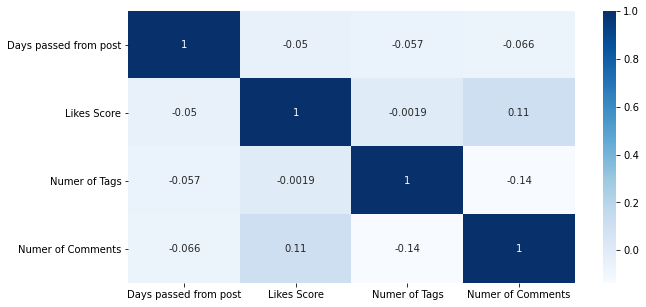

In [4]:
corr_df = df[['Days passed from post',"Likes Score","Numer of Tags","Numer of Comments"]]
corr_df = corr_df.corr(method='spearman')
plt.figure(figsize = (10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(data=corr_df,cmap='Blues', annot=True)
plt.show()

#### We searched for correlation between the likes score and the numeric columns of the DataFrame to see the connection between them.
#### *Likes Score is the rate of the likes related to the maximun number of likes the account achieved.

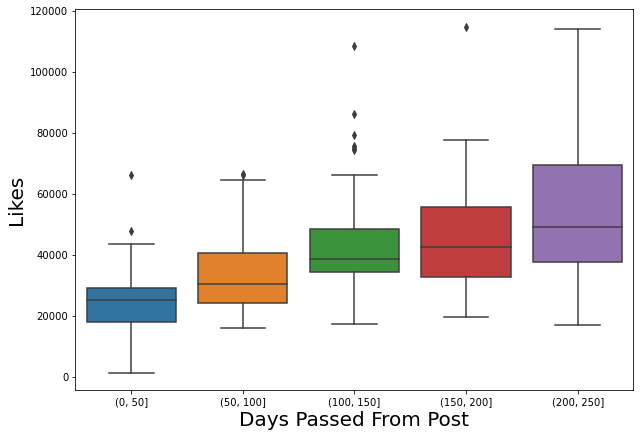

In [5]:
days_passed_df = df[["Days passed from post","Likes"]]
days_passed_df = days_passed_df.groupby("Days passed from post")[["Days passed from post","Likes"]].mean()
days_passed_df['binned'] = pd.cut(days_passed_df["Days passed from post"],bins=range(0, 300, 50))

fig, ax = plt.subplots()
sns.boxplot(x="binned", y="Likes", data=days_passed_df)
plt.xlabel("Days Passed From Post",fontsize=20)
plt.ylabel("Likes",fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

#### We created a new DataFrame including only "Likes" and "Days Passed From Post" columns, we cut the days from 0-250 in a 50 days range into 5 boxplots, the graph shows that there is an increase in both median and the high quarter of each boxplot. 
#### This can be explained by the growing number of likes(stacking).

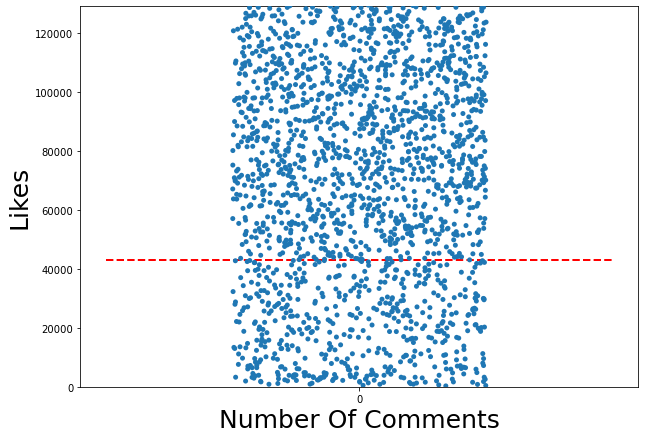

In [6]:
comm_df = df[["Numer of Comments", "Likes"]]
likes_mean = comm_df["Likes"].mean()
comm_df = comm_df.groupby("Numer of Comments")["Likes"].mean()
fig, ax = plt.subplots()
sns.stripplot(data=comm_df,label="Number Of Comments")
fig.set_size_inches(10, 7)
plt.xlabel("Number Of Comments",fontsize=25)
plt.ylabel("Likes",fontsize=25)
ax.hlines(y=likes_mean, xmin=-0.2, xmax=0.2, linewidth=2, color='r',linestyle='--',label="Mean")
plt.ylim((0, likes_mean*3))
plt.show()

#### We created a new DataFrame with the "Number of Comments" and "Likes" columns. We can see in the stripplot that in any range of likes between 0-120k there is the same number of comments approximatley (no differnece from the mean area marked by the red dotted line).

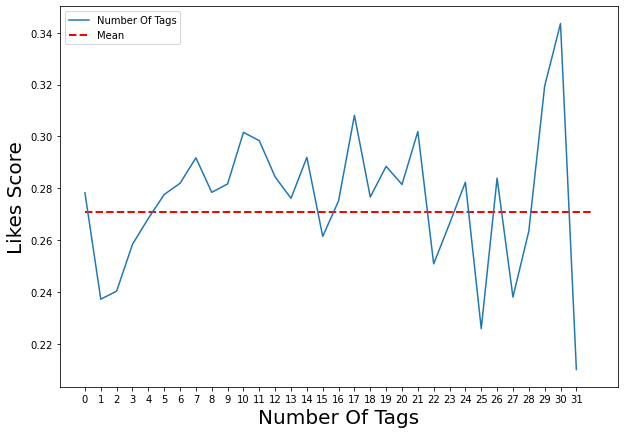

In [7]:
tag_df = df[["Numer of Tags", "Likes Score"]]
likes_score_mean = df["Likes Score"].mean()
tag_df = tag_df.groupby("Numer of Tags")["Likes Score"].mean()
fig, ax = plt.subplots()
sns.lineplot(data=tag_df,label="Number Of Tags")
fig.set_size_inches(10, 7)
plt.xlabel("Number Of Tags",fontsize=20)
plt.ylabel("Likes Score",fontsize=20)
ax.hlines(y=likes_score_mean, xmin=0, xmax=32, linewidth=2, color='r',linestyle='--',label="Mean")
plt.xticks(np.arange(0, 32, 1))
plt.legend()
plt.show()

#### We created a new DataFrame with the "Number of Tags" and "Likes Score" columns. We used the "Likes Score" column to check the rate between each acccount individualy to keep the data valid. The data shows that there isn't a growing rate to the "Likes Score" column mean when the "Number of Tags" column is growing.

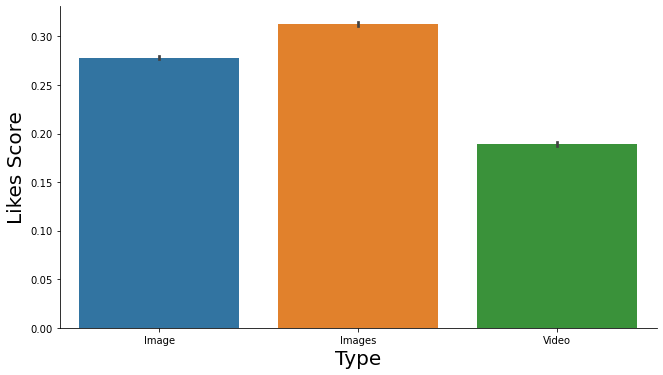

In [8]:
type_df = df[["Type", "Likes Score"]]
sns.catplot(data=type_df, kind="bar", x="Type", y = "Likes Score",height=5,aspect=1.8)
plt.xlabel("Type",fontsize=20)
plt.ylabel("Likes Score",fontsize=20)
plt.show()

#### We created a new DataFrame with the "Type" and "Likes Score" columns and showed the mean rate of "Likes Score" in each type: "Image", "Images" and "Video". The graph shows that the "Images" type is getting the highest rate of "Likes Score", with "Image" afterwards and "Video" last.

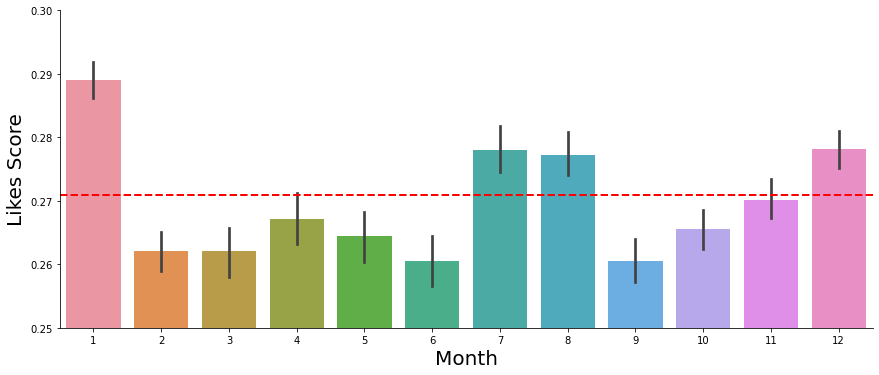

In [9]:
month_df = df[["Month","Likes Score"]]
month_plot = sns.catplot(x="Month",
            y="Likes Score", 
            data=month_df, 
            kind='bar',
            height=5,
            aspect=2.4)
plt.ylim((0.25, 0.3))
plt.xticks(np.arange(0, 12, 1))
month_plot.map(plt.axhline, y=likes_score_mean, ls='--', color='r', linewidth=2)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Likes Score",fontsize=20)
plt.show()

#### We created a new DataFrame with the "Month" and "Likes Score" columns and showed the mean rate of "Likes Score" in every month. The graph shows that there are four months with a mean value of likes score higher than avarage - July, August, December and January.

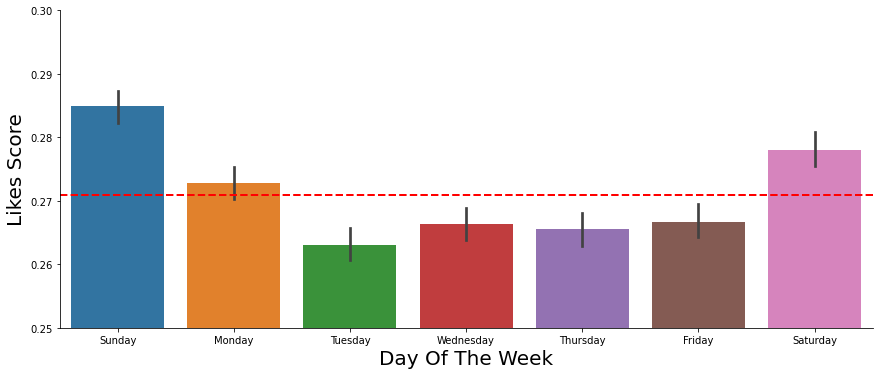

In [10]:
week_days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Day Name']=df['Date Posted'].dt.strftime("%A")
day_df = df[["Day Name","Likes Score"]]
day_plot = sns.catplot(x="Day Name",
            y="Likes Score", 
            data=day_df, 
            kind='bar',
            height=5,
            aspect=2.4,
            order= week_days)
plt.ylim((0.25, 0.3))
plt.xticks(np.arange(0, 7, 1))
day_plot.map(plt.axhline, y=likes_score_mean, ls='--', color='r', linewidth=2)
plt.xlabel("Day Of The Week",fontsize=20)
plt.ylabel("Likes Score",fontsize=20)
plt.show()

#### We created a new column named "Day Name" which shows the day of the week from the "Date Posted" column. Than we created a new DataFrame with the "Day Name" and "Likes Score" columns and showed the mean rate of "Likes Score" in every day of the week. The graph shows that there are three days with a higher likes score than avarage - Sunday, saturday and monday by that order.

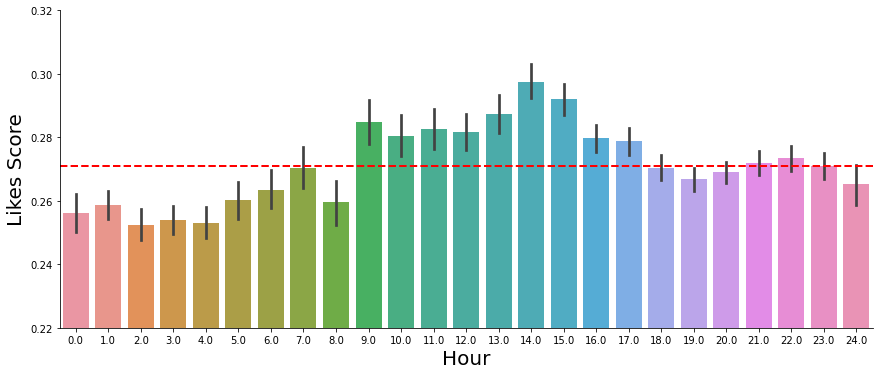

In [11]:
hour_min_df = df[["Likes Score","Hour","Minute"]]
hour_min_df["Hour"] = round(df["Hour"]+df["Minute"]/60)
hour_min_df.drop(["Minute"],axis=1,inplace=True)
hour_plot= sns.catplot(x="Hour",
            y="Likes Score", 
            data=hour_min_df, 
            kind='bar',
            height=5,
            aspect=2.4)
plt.ylim((0.22, 0.32))
plt.xticks(np.arange(0, 25, 1))
hour_plot.map(plt.axhline, y=likes_score_mean, ls='--', color='r', linewidth=2)
plt.xlabel("Hour",fontsize=20)
plt.ylabel("Likes Score",fontsize=20)
plt.show()

#### We created a new DataFrame including "Likes Score","Hour","Minute" columns, we rounded the hour column to prevent diversion and showed the likes score mean on each hour.
#### The graph shows that there is a range above the likes score mean between nine am and five pm.